+-------------------------------------+----+---------------+-------------+----------+---------+
|               Source                | DF | Sum of Square | Mean Square |    F     | p-value |
+-------------------------------------+----+---------------+-------------+----------+---------+
|              Operator               | 2  |     0.048     |    0.024    |  4.1672  | 0.03256 |
|                Part                 | 9  |    2.05871    |   0.22875   | 39.71785 |   0.0   |
|    Interaction (Operator x Part)    | 18 |    0.10367    |   0.00576   | 4.45878  | 0.00016 |
|  Repeatability (with Interaction)   | 30 |    0.03875    |   0.00129   |          |         |
| Repeatability (without Interaction) | 48 |    0.14242    |   0.00297   |          |         |
+-------------------------------------+----+---------------+-------------+----------+---------+
SD Total w Int: 0.2039653202185407


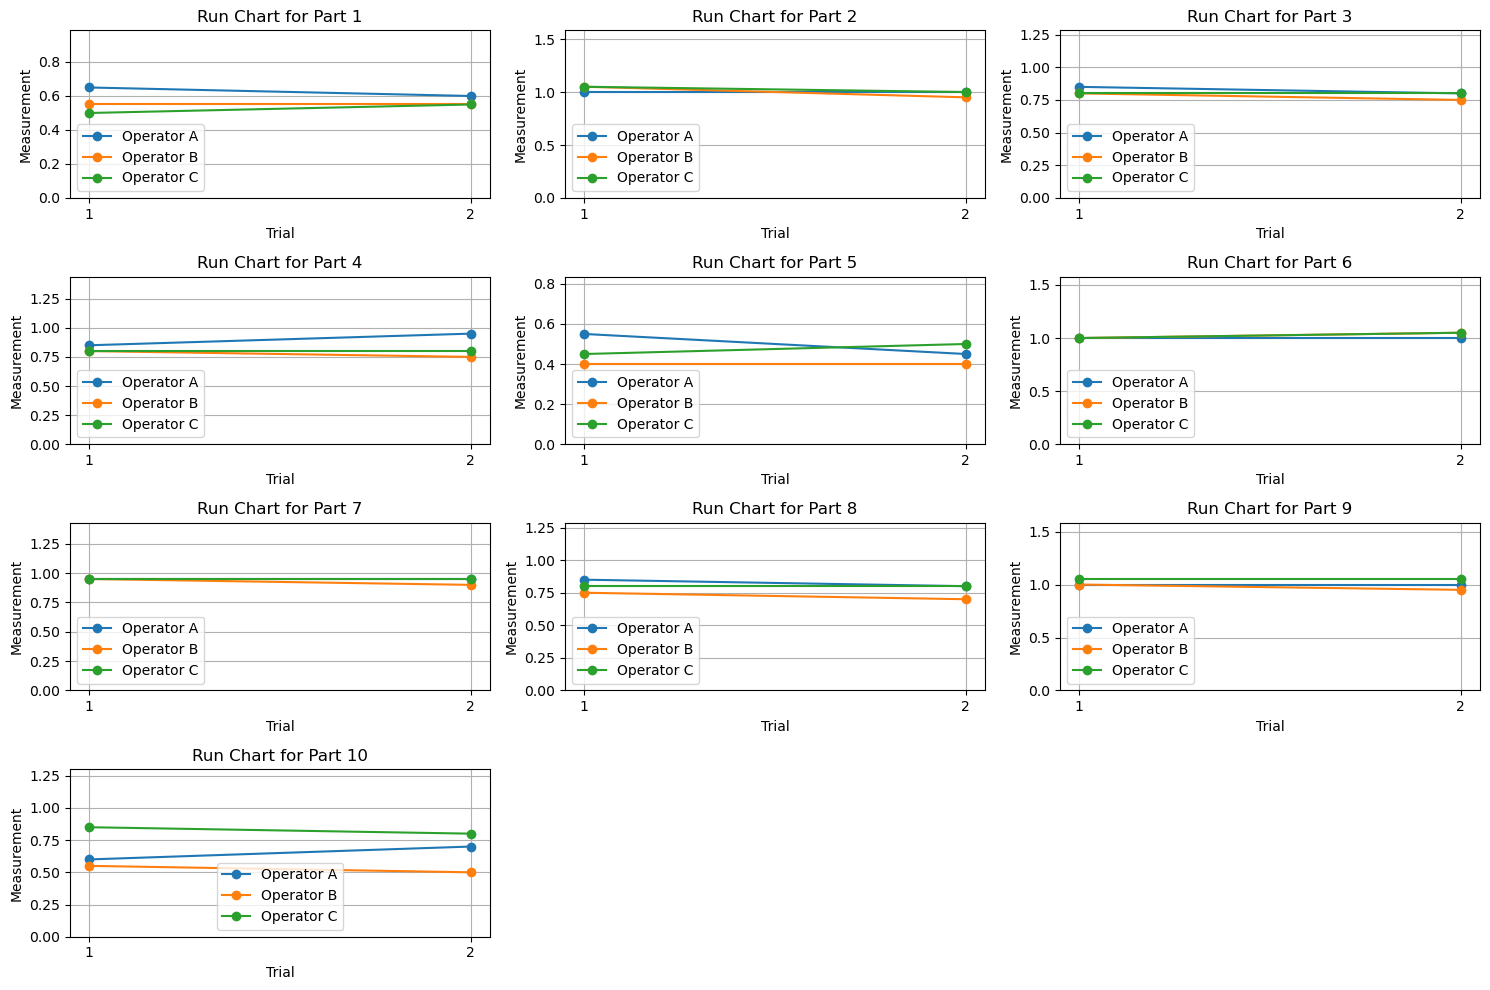

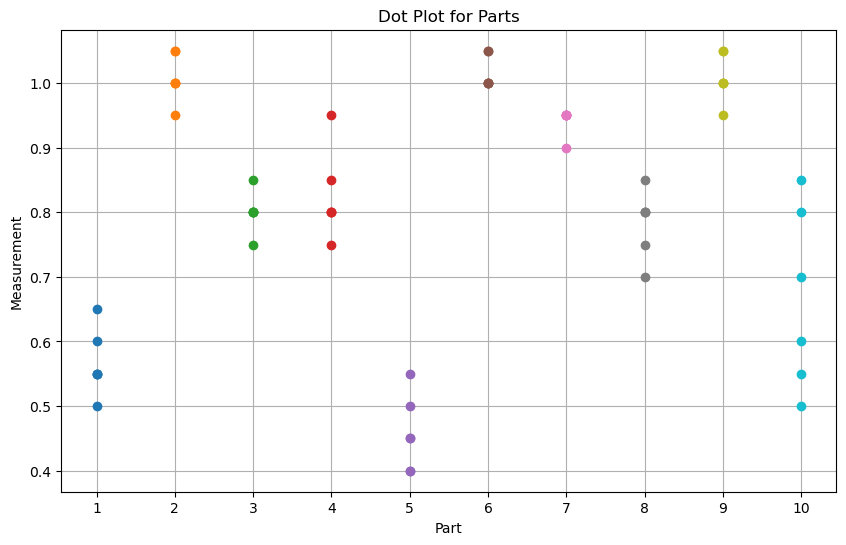

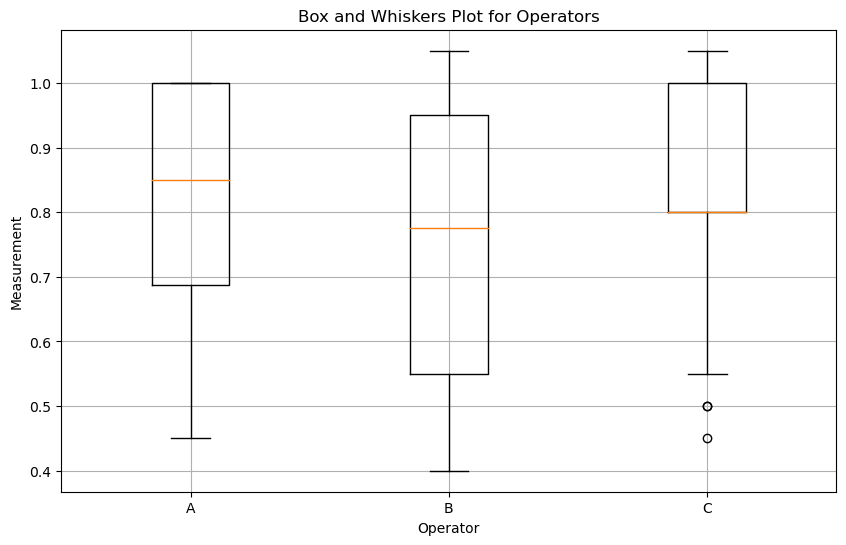

P-value: operator x part 0.00015631173584762514
P-value for operator x part is 0.00015631173584762514 which is less than threshold 0.05 
Operator x Part interaction is statistically significant
With Interaction:
+-------------------------+---------+
|         Sigma^2         |  Value  |
+-------------------------+---------+
|  Sigma^2 Repeatability  | 0.00129 |
| Sigma^2 Operator x Part | 0.00223 |
|      Sigma^2 Part       | 0.03716 |
|    Sigma^2 Operator     | 0.00091 |
+-------------------------+---------+
With Interaction:
+-----------------------------+----------+-------------------------+-------------------------+-------------+------------------+
|           Source            | Variance | % Contribution Variance | Standard Deviation (SD) | SV (6 * SD) | % Study Variance |
+-----------------------------+----------+-------------------------+-------------------------+-------------+------------------+
|       Total Gage R&R        | 0.00444  |        10.66659         |         0.066

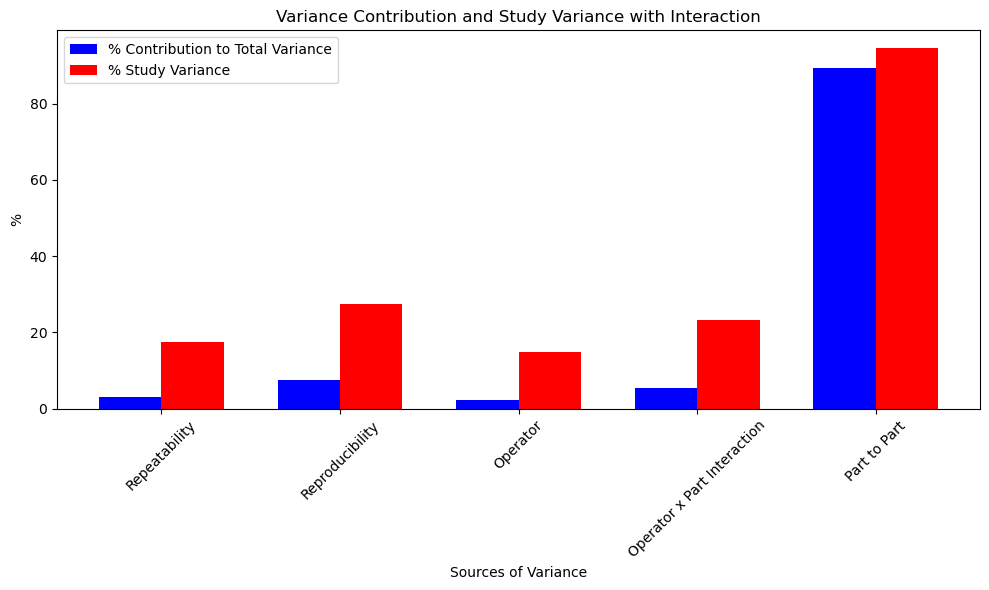

In [1]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import pandas as pd
from tabulate import tabulate
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np
import math

class GaugeRRApp:
    def __init__(self, master):
        # Initialize the GaugeRRApp class with a master widget (typically the main application window)
        self.master = master
        # Set the title of the master window
        self.master.title("Gauge R&R Analysis")
        
        # Call the method to create GUI widgets
        self.create_widgets()
    
    def create_widgets(self):
        # Create and place GUI widgets
        
        # Label for file selection
        self.file_label = ttk.Label(self.master, text="Select Excel File:")
        self.file_label.grid(row=0, column=0, padx=10, pady=5, sticky="w")
        
        # Entry widget for file path
        self.file_entry = ttk.Entry(self.master, width=40)
        self.file_entry.grid(row=0, column=1, padx=10, pady=5, sticky="w")
        
        # Button to browse for a file
        self.browse_button = ttk.Button(self.master, text="Browse", command=self.browse_file)
        self.browse_button.grid(row=0, column=2, padx=10, pady=5, sticky="w")
        
        # Label for selecting operator column
        self.operator_label = ttk.Label(self.master, text="Operator Column:")
        self.operator_label.grid(row=1, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting operator column
        self.operator_var = tk.StringVar(self.master)
        self.operator_dropdown = ttk.Combobox(self.master, textvariable=self.operator_var, width=20)
        self.operator_dropdown.grid(row=1, column=1, padx=10, pady=5, sticky="w")
        
        # Label for selecting part column
        self.part_label = ttk.Label(self.master, text="Part Column:")
        self.part_label.grid(row=2, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting part column
        self.part_var = tk.StringVar(self.master)
        self.part_dropdown = ttk.Combobox(self.master, textvariable=self.part_var, width=20)
        self.part_dropdown.grid(row=2, column=1, padx=10, pady=5, sticky="w")
        
        # Label for selecting trials column
        self.trials_label = ttk.Label(self.master, text="Trials Column:")
        self.trials_label.grid(row=3, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting trials column
        self.trials_var = tk.StringVar(self.master)
        self.trials_dropdown = ttk.Combobox(self.master, textvariable=self.trials_var, width=20)
        self.trials_dropdown.grid(row=3, column=1, padx=10, pady=5, sticky="w")
        
        # Label for selecting measurement column
        self.measurement_label = ttk.Label(self.master, text="Measurement Column:")
        self.measurement_label.grid(row=4, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting measurement column
        self.measurement_var = tk.StringVar(self.master)
        self.measurement_dropdown = ttk.Combobox(self.master, textvariable=self.measurement_var, width=20)
        self.measurement_dropdown.grid(row=4, column=1, padx=10, pady=5, sticky="w")
       
        # Button to run the analysis
        self.run_button = ttk.Button(self.master, text="Run Analysis", command=self.run_analysis)
        self.run_button.grid(row=6, column=0, columnspan=3, padx=10, pady=10, sticky="we")
        
        
    def browse_file(self):
        # Open a file dialog to select an Excel file
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx;*.xls")])
        # If a file is selected
        if file_path:
            # Clear any previous entry and insert the selected file path
            self.file_entry.delete(0, tk.END)
            self.file_entry.insert(0, file_path)
            # Call the method to load Excel columns
            self.load_excel_columns(file_path)
    
    def load_excel_columns(self, file_path):
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        # Get the list of column names
        columns = df.columns.tolist()
        # Populate the dropdown menus with the column names
        self.operator_dropdown['values'] = columns
        self.part_dropdown['values'] = columns
        self.trials_dropdown['values'] = columns
        self.measurement_dropdown['values'] = columns
   
    def run_analysis(self):
        # Get the file path from the entry widget
        file_path = self.file_entry.get()
        
        # Check if a file path is provided
        if not file_path:
            print("Error: Please select an Excel file.")
            return
        
        try:
            # Read the Excel file into a DataFrame
            df = pd.read_excel(file_path)
            # Get selected column names from dropdown menus
            operator_column = self.operator_var.get()
            part_column = self.part_var.get()
            trials_column = self.trials_var.get()
            measurement_column = self.measurement_var.get()

            # Check if all required columns are selected
            if not all([operator_column, part_column, trials_column, measurement_column]):
                print("Please select all columns.")
                return
            
            # Perform ANOVA
            results = self.perform_crossed_anova(df, operator_column, part_column, trials_column, measurement_column)

            # Plot run charts for each operator
            self.plot_run_charts(df)

            # Plot dot plots for each part
            self.plot_dot_plots(df)
            
            # Plot box and whiskers for each operator
            self.plot_box_whiskers(df)
            
            # If ANOVA results are available
            if results:
                # Retrieve p-value for Operator x Part interaction
                p_operatorxpart = results.get("p_operatorxpart")

                # Print p-value and decide significance
                print("P-value: operator x part", p_operatorxpart)

                # Set threshold for deciding significance
                threshold = 0.05

                if p_operatorxpart is not None and p_operatorxpart > threshold:
                    print("P-value for operator x part is", p_operatorxpart,
                          "which is greater than threshold", threshold,
                          "\nOperator x Part interaction is not statistically significant")
                    # Print tables for "without Interaction"
                    self.print_wo_int(results)
                else:
                    print("P-value for operator x part is", p_operatorxpart,
                          "which is less than threshold", threshold,
                          "\nOperator x Part interaction is statistically significant")
                    # Print tables for "with Interaction"
                    self.print_w_int(results)

        except Exception as e:
            print(f"An error occurred: {str(e)}")
   
    def perform_crossed_anova(self, df, operator_column, part_column, trials_column, measurement_column):
        """
        Perform crossed ANOVA (Analysis of Variance) to analyze the variance contributions
        of different factors such as operators, parts, and their interactions in a measurement
        system. The function calculates the sum of squares and mean squares for various sources
        of variance, including operator, part, operator x part interaction, and repeatability.

        Args:
            df (DataFrame): The DataFrame containing the data.
            operator_column (str): The name of the column representing operators.
            part_column (str): The name of the column representing parts.
            trials_column (str): The name of the column representing trials.
            measurement_column (str): The name of the column representing measurements.

        Returns:
            dict or None: A dictionary containing the results of the analysis, including sum
            of squares, mean squares, F-statistics, p-values, and other relevant statistics,
            or None if an error occurs during calculation.
        """
        try:
            # Retrieve selected column names from dropdown menus
            operator_column = self.operator_var.get()
            part_column = self.part_var.get()
            trials_column = self.trials_var.get()
            measurement_column = self.measurement_var.get()

            # Check if all columns are selected
            if not operator_column or not part_column or not trials_column or not measurement_column:
                messagebox.showerror("Error", "Please select all columns.")
                return None

            # Calculate the operator sum of squares
            operator_avg = df.groupby(operator_column)[measurement_column].mean()
            overall_avg = df[measurement_column].mean()
            SS_operator = ((operator_avg - overall_avg) ** 2).sum() * len(df[part_column].unique()) * len(df[trials_column].unique())

            # Step 2: Compute the parts sum of squares
            part_avg = df.groupby(part_column)[measurement_column].mean()

            SS_part = ((part_avg - overall_avg) ** 2).sum() * len(df[operator_column].unique()) * len(df[trials_column].unique())


            # Calculate the total sum of squares
            SS_total = ((df[measurement_column] - overall_avg) ** 2).sum()


            # Compute Equipment within the sum of squares
            SS_equipment = 0
            for part in df[part_column].unique():
                for operator in df[operator_column].unique():
                    part_operator_avg = df[(df[part_column] == part) & (df[operator_column] == operator)][measurement_column].mean()
                    squared_deviation = ((df[(df[part_column] == part) & (df[operator_column] == operator)][measurement_column] - part_operator_avg) ** 2).sum()
                    SS_equipment += squared_deviation


            # Find the interaction sum of squares
            SS_operatorxpart = SS_total - (SS_operator + SS_part + SS_equipment)

            # Calculate repeatability with and without interaction
            SS_repeatability_w_int = SS_equipment
            SS_repeatability_wo_int = SS_operatorxpart + SS_repeatability_w_int
            
            # Evaluate degrees of freedom
            n_operators = len(df[operator_column].unique())
            n_parts = len(df[part_column].unique())
            n_trials = len(df[trials_column].unique())
            df_operator = n_operators - 1
            df_part = n_parts - 1
            df_operatorxpart = df_operator * df_part
            df_repeatability_w_int = n_operators * n_parts * (n_trials-1)
            df_repeatability_wo_int = df_repeatability_w_int + df_operatorxpart

            # Calculate mean squares
            MS_repeatability_w_int = SS_repeatability_w_int / df_repeatability_w_int
            MS_repeatability_wo_int = SS_repeatability_wo_int / df_repeatability_wo_int
            MS_operatorxpart = SS_operatorxpart / df_operatorxpart
            MS_part = SS_part / df_part
            MS_equipment = SS_equipment / (n_operators * n_parts * (n_trials - 1))
            MS_operator = SS_operator / df_operator

            # Calculate F-values
            F_operator = MS_operator / MS_operatorxpart
            F_part = MS_part / MS_operatorxpart
            F_operatorxpart = MS_operatorxpart / MS_equipment

            # Calculate p-values
            p_operator = 1 - f.cdf(abs(F_operator), df_operator, df_operatorxpart)
            p_part = 1 - f.cdf(abs(F_part), df_part, df_operatorxpart)
            p_operatorxpart = 1 - f.cdf(abs(F_operatorxpart), df_operatorxpart, df_repeatability_w_int)

            
            # Diagnostic prints, uncomment as needed. 
            #  # Print ANOVA results
            # print("SS_operator:", round(SS_operator, 5))
            # print("SS_part:", round(SS_part, 5))
            # print("SS_total:", round(SS_total, 5))
            # print("SS_equipment:", round(SS_equipment, 5))
            # print("SS_operatorxpart:", round(SS_operatorxpart, 5))
            # print("SS_repeatability_w_int:", round(SS_repeatability_w_int, 5))
            # print("SS_repeatability_wo_int:", round(SS_repeatability_wo_int, 5))

            # print("df_operator:", round(df_operator, 5))
            # print("df_part:", round(df_part, 5))
            # print("df_operatorxpart:", round(df_operatorxpart, 5))
            # print("df_repeatability_w_int:", round(df_repeatability_w_int, 5))
            # print("df_repeatability_wo_int:", round(df_repeatability_wo_int, 5))

            # print("MS_repeatability_w_int:", round(MS_repeatability_w_int, 5))
            # print("MS_repeatability_wo_int:", round(MS_repeatability_wo_int, 5))
            # print("MS_operatorxpart:", round(MS_operatorxpart, 5))
            # print("MS_part:", round(MS_part, 5))
            # print("MS_equipment:", round(MS_equipment, 5))
            # print("MS_operator:", round(MS_operator, 5))

            # print("F_operator:", round(F_operator, 5))
            # print("F_part:", round(F_part, 5))
            # print("F_operatorxpart:", round(F_operatorxpart, 5))

            # print("p_operator:", round(p_operator, 5))
            # print("p_part:", round(p_part, 5))
            # print("p_operatorxpart:", round(p_operatorxpart, 5))
            
            # Create and print ANOVA table
            table_data = [
                ["Operator", round(df_operator, 5), round(SS_operator, 5), round(MS_operator, 5), round(F_operator, 5), round(p_operator, 5)],
                ["Part", round(df_part, 5), round(SS_part, 5), round(MS_part, 5), round(F_part, 5), round(p_part, 5)],
                ["Interaction (Operator x Part)", round(df_operatorxpart, 5), round(SS_operatorxpart, 5), round(MS_operatorxpart, 5), round(F_operatorxpart, 5), round(p_operatorxpart, 5)],
                ["Repeatability (with Interaction)", round(df_repeatability_w_int, 5), round(SS_repeatability_w_int, 5), round(MS_repeatability_w_int, 5), ""],
                ["Repeatability (without Interaction)", round(df_repeatability_wo_int, 5), round(SS_repeatability_wo_int, 5), round(MS_repeatability_wo_int, 5), ""]
            ]

            headers = ["Source", "DF", "Sum of Square", "Mean Square", "F", "p-value"]
            print(tabulate(table_data, headers=headers, tablefmt="pretty"))

            # Calculate additional statistics for both with and without interaction
            sigma2_wo_int = MS_repeatability_wo_int
            sigma2_w_int = MS_repeatability_w_int
            sigma2_operatorxpart_wo_int = max((MS_operatorxpart - sigma2_wo_int) / n_trials, 0)
            sigma2_operatorxpart_w_int = max((MS_operatorxpart - sigma2_w_int) / n_trials, 0)
            sigma2_part = (MS_part - MS_operatorxpart) / (n_trials * n_operators)
            sigma2_operator = (MS_operator - MS_operatorxpart) / (n_trials * n_parts)
            sigma2_reproducibility_w_int = sigma2_operator + sigma2_operatorxpart_w_int
            sigma2_reproducibility_wo_int = sigma2_operator + sigma2_operatorxpart_wo_int

            # General variables
            SD_operator = sigma2_operator ** 0.5
            SD_p2p = sigma2_part ** 0.5
            SV_operator = SD_operator * 6
            SV_p2p = SD_p2p * 6

            # Variables related to with interaction
            variance_totalGRR_w_int = sigma2_w_int + sigma2_reproducibility_w_int
            variance_reproducibility_w_int = sigma2_operator + sigma2_operatorxpart_w_int
            var_tot_w_int = sigma2_w_int + sigma2_operator + sigma2_operatorxpart_w_int + sigma2_part
            pct_var_contb_totalGRR_w_int = (variance_totalGRR_w_int / var_tot_w_int) * 100
            pct_var_contb_repeatability_w_int = (sigma2_w_int / var_tot_w_int) * 100
            pct_var_contb_reproducibility_w_int = (variance_reproducibility_w_int / var_tot_w_int) * 100
            pct_var_contb_operator_w_int = (sigma2_operator / var_tot_w_int) * 100
            pct_var_contb_operatorxpart_w_int = (sigma2_operatorxpart_w_int / var_tot_w_int) * 100
            pct_var_contb_p2p_w_int = (sigma2_part / var_tot_w_int) * 100
            SD_totalGRR_w_int = variance_totalGRR_w_int ** 0.5
            SD_repeatability_w_int = sigma2_w_int ** 0.5
            SD_reproducibility_w_int = variance_reproducibility_w_int ** 0.5
            SD_operatorxpart_w_int = sigma2_operatorxpart_w_int ** 0.5
            SD_total_w_int = var_tot_w_int ** 0.5
            SV_totalGRR_w_int = SD_totalGRR_w_int * 6
            SV_repeatability_w_int = SD_repeatability_w_int * 6
            SV_reproducibility_w_int = SD_reproducibility_w_int * 6
            SV_operatorxpart_w_int = SD_operatorxpart_w_int * 6
            SV_total_w_int = SD_total_w_int * 6
            pct_SV_totalGRR_w_int = (SD_totalGRR_w_int / SD_total_w_int) * 100
            pct_SV_repeatability_w_int = (SD_repeatability_w_int / SD_total_w_int) * 100
            pct_SV_reproducibility_w_int = (SD_reproducibility_w_int / SD_total_w_int) * 100
            pct_SV_operator_w_int = (SD_operator / SD_total_w_int) * 100
            pct_SV_operatorxpart_w_int = (SD_operatorxpart_w_int / SD_total_w_int) * 100
            pct_SV_p2p_w_int = (SD_p2p / SD_total_w_int) * 100

            print("SD Total w Int:", SD_total_w_int)

            # Variables related to without interaction
            variance_totalGRR_wo_int = sigma2_wo_int + sigma2_reproducibility_wo_int
            variance_reproducibility_wo_int = sigma2_operator + sigma2_operatorxpart_wo_int
            var_tot_wo_int = sigma2_wo_int + sigma2_operator + sigma2_operatorxpart_wo_int + sigma2_part
            pct_var_contb_totalGRR_wo_int = (variance_totalGRR_wo_int / var_tot_wo_int) * 100
            pct_var_contb_repeatability_wo_int = (sigma2_wo_int / var_tot_wo_int) * 100
            pct_var_contb_reproducibility_wo_int = (variance_reproducibility_wo_int / var_tot_wo_int) * 100
            pct_var_contb_operator_wo_int = (sigma2_operator / var_tot_wo_int) * 100
            pct_var_contb_operatorxpart_wo_int = (sigma2_operatorxpart_wo_int / var_tot_wo_int) * 100
            pct_var_contb_p2p_wo_int = (sigma2_part / var_tot_wo_int) * 100
            SD_totalGRR_wo_int = variance_totalGRR_wo_int ** 0.5
            SD_repeatability_wo_int = sigma2_wo_int ** 0.5
            SD_reproducibility_wo_int = variance_reproducibility_wo_int ** 0.5
            SD_operatorxpart_wo_int = sigma2_operatorxpart_wo_int ** 0.5
            SD_total_wo_int = var_tot_wo_int ** 0.5
            SV_totalGRR_wo_int = SD_totalGRR_wo_int * 6
            SV_repeatability_wo_int = SD_repeatability_wo_int * 6
            SV_reproducibility_wo_int = SD_reproducibility_wo_int * 6
            SV_operatorxpart_wo_int = SD_operatorxpart_wo_int * 6
            SV_total_wo_int = SD_total_wo_int * 6
            pct_SV_totalGRR_wo_int = (SD_totalGRR_wo_int / SD_total_wo_int) * 100
            pct_SV_repeatability_wo_int = (SD_repeatability_wo_int / SD_total_wo_int) * 100
            pct_SV_reproducibility_wo_int = (SD_reproducibility_wo_int / SD_total_wo_int) * 100
            pct_SV_operator_wo_int = (SD_operator / SD_total_wo_int) * 100
            pct_SV_operatorxpart_wo_int = (SD_operatorxpart_wo_int / SD_total_wo_int) * 100
            pct_SV_p2p_wo_int = (SD_p2p / SD_total_wo_int) * 100

            # Return ANOVA results
            return {
                # General variables
                "SD_operator": SD_operator,
                "SD_p2p": SD_p2p,
                "p_operatorxpart": p_operatorxpart,
                "SV_operator": SV_operator,
                "SV_p2p": SV_p2p,

                #variables for with interaction
                "sigma2_w_int": sigma2_w_int,
                "sigma2_operatorxpart_w_int": sigma2_operatorxpart_w_int,
                "sigma2_part": sigma2_part,
                "sigma2_operator": sigma2_operator,
                "variance_totalGRR_w_int": variance_totalGRR_w_int,
                "variance_reproducibility_w_int": variance_reproducibility_w_int,
                "var_tot_w_int": var_tot_w_int,
                "pct_var_contb_totalGRR_w_int": pct_var_contb_totalGRR_w_int,
                "pct_var_contb_repeatability_w_int": pct_var_contb_repeatability_w_int,
                "pct_var_contb_reproducibility_w_int": pct_var_contb_reproducibility_w_int,
                "pct_var_contb_operator_w_int": pct_var_contb_operator_w_int,
                "pct_var_contb_operatorxpart_w_int": pct_var_contb_operatorxpart_w_int,
                "pct_var_contb_p2p_w_int": pct_var_contb_p2p_w_int,
                "SD_totalGRR_w_int": SD_totalGRR_w_int,
                "SD_repeatability_w_int": SD_repeatability_w_int,
                "SD_reproducibility_w_int": SD_reproducibility_w_int,
                "SD_operatorxpart_w_int": SD_operatorxpart_w_int,
                "SD_total_w_int": SD_total_w_int,
                "SV_totalGRR_w_int": SV_totalGRR_w_int,
                "SV_repeatability_w_int": SV_repeatability_w_int,
                "SV_reproducibility_w_int": SV_reproducibility_w_int,
                "SV_operatorxpart_w_int": SV_operatorxpart_w_int, 
                "SV_total_w_int": SV_total_w_int,
                "pct_SV_totalGRR_w_int": pct_SV_totalGRR_w_int,
                "pct_SV_repeatability_w_int": pct_SV_repeatability_w_int,
                "pct_SV_reproducibility_w_int": pct_SV_reproducibility_w_int,
                "pct_SV_operator_w_int": pct_SV_operator_w_int,
                "pct_SV_operatorxpart_w_int": pct_SV_operatorxpart_w_int,
                "pct_SV_p2p_w_int": pct_SV_p2p_w_int,
                
                # Variables for without interaction
                "sigma2_wo_int": sigma2_wo_int,
                "sigma2_operatorxpart_wo_int": sigma2_operatorxpart_wo_int,
                "sigma2_part": sigma2_part,
                "sigma2_operator": sigma2_operator,
                "variance_totalGRR_wo_int": variance_totalGRR_wo_int,
                "variance_reproducibility_wo_int": variance_reproducibility_wo_int,
                "var_tot_wo_int": var_tot_wo_int,
                "pct_var_contb_totalGRR_wo_int": pct_var_contb_totalGRR_wo_int,
                "pct_var_contb_repeatability_wo_int": pct_var_contb_repeatability_wo_int,
                "pct_var_contb_reproducibility_wo_int": pct_var_contb_reproducibility_wo_int,
                "pct_var_contb_operator_wo_int": pct_var_contb_operator_wo_int,
                "pct_var_contb_operatorxpart_wo_int": pct_var_contb_operatorxpart_wo_int,
                "pct_var_contb_p2p_wo_int": pct_var_contb_p2p_wo_int,
                "SD_totalGRR_wo_int": SD_totalGRR_wo_int,
                "SD_repeatability_wo_int": SD_repeatability_wo_int,
                "SD_reproducibility_wo_int": SD_reproducibility_wo_int,
                "SD_operatorxpart_wo_int": SD_operatorxpart_wo_int,
                "SD_total_wo_int": SD_total_wo_int,
                "SV_totalGRR_wo_int": SV_totalGRR_wo_int,
                "SV_repeatability_wo_int": SV_repeatability_wo_int,
                "SV_reproducibility_wo_int": SV_reproducibility_wo_int,
                "SV_operatorxpart_wo_int": SV_operatorxpart_wo_int,
                "SV_total_wo_int": SV_total_wo_int,
                "pct_SV_totalGRR_wo_int": pct_SV_totalGRR_wo_int,
                "pct_SV_repeatability_wo_int": pct_SV_repeatability_wo_int,
                "pct_SV_reproducibility_wo_int": pct_SV_reproducibility_wo_int,
                "pct_SV_operator_wo_int": pct_SV_operator_wo_int,
                "pct_SV_operatorxpart_wo_int": pct_SV_operatorxpart_wo_int,
                "pct_SV_p2p_wo_int": pct_SV_p2p_wo_int             
                
            }
        except Exception as e:
            print("Error", f"An error occured during ANOVA calculation: {str(e)}")
            return None

    def plot_variance_contributions_w_int(self, results):
        """
        Plot variance contributions with interaction.

        Args:
            results (dict): A dictionary containing the results of the analysis.

        Returns:
            None
        """
        # Define labels and sizes for the plot
        labels = ['Repeatability', 'Reproducibility', 'Operator', 'Operator x Part Interaction', 'Part to Part']
        sizes = [results["pct_var_contb_repeatability_w_int"], 
                results["pct_var_contb_reproducibility_w_int"], 
                results["pct_var_contb_operator_w_int"], 
                results["pct_var_contb_operatorxpart_w_int"], 
                results["pct_var_contb_p2p_w_int"]]
        study_variance = [results["pct_SV_repeatability_w_int"],
                        results["pct_SV_reproducibility_w_int"],
                        results["pct_SV_operator_w_int"],
                        results["pct_SV_operatorxpart_w_int"],
                        results["pct_SV_p2p_w_int"]]
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        # Create subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot bars for contribution to total variance
        rects1 = ax.bar(x - width/2, sizes, width, label='% Contribution to Total Variance', color='b')
        
        # Plot bars for study variance
        rects2 = ax.bar(x + width/2, study_variance, width, label='% Study Variance', color='r')

        # Add labels, title, and legend
        ax.set_xlabel('Sources of Variance')
        ax.set_ylabel('%')
        ax.set_title('Variance Contribution and Study Variance with Interaction')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45)
        ax.legend()

        # Adjust layout and display plot
        fig.tight_layout()
        plt.show()

    
    def plot_variance_contributions_wo_int(self, results):
        """
        Plot variance contributions without interaction.

        Args:
            results (dict): A dictionary containing the results of the analysis.

        Returns:
            None
        """
        # Define labels and sizes for the plot
        labels = ['Repeatability', 'Reproducibility', 'Operator', 'Part to Part']
        sizes = [results["pct_var_contb_repeatability_wo_int"], 
                results["pct_var_contb_reproducibility_wo_int"], 
                results["pct_var_contb_operator_wo_int"], 
                results["pct_var_contb_p2p_wo_int"]]
        study_variance = [results["pct_SV_repeatability_wo_int"],
                        results["pct_SV_reproducibility_wo_int"],
                        results["pct_SV_operator_wo_int"],
                        results["pct_SV_p2p_wo_int"]]

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        # Create subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot bars for contribution to total variance
        rects1 = ax.bar(x - width/2, sizes, width, label='% Contribution to Total Variance', color='b')
        
        # Plot bars for study variance
        rects2 = ax.bar(x + width/2, study_variance, width, label='% Study Variance', color='r')

        # Add labels, title, and legend
        ax.set_xlabel('Sources of Variance')
        ax.set_ylabel('%')
        ax.set_title('Variance Contribution and Study Variance without Interaction')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45)
        ax.legend()

        # Adjust layout
        fig.tight_layout()
        plt.show()

    def plot_run_charts(self, df):
        """
        Plot run charts for each part.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        parts = df[self.part_var.get()].unique()
        measurement_column = self.measurement_var.get()
        num_parts = len(parts)
        num_cols = 3  # Adjust the number of columns as needed
        num_rows = math.ceil(num_parts / num_cols)

        # Create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

        for idx, part in enumerate(parts):
            part_data = df[df[self.part_var.get()] == part]
            operators = part_data[self.operator_var.get()].unique()
            trials = part_data[self.trials_var.get()].unique()
            row = idx // num_cols
            col = idx % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]

            ax.set_title(f"Run Chart for Part {part}")
            ax.set_xlabel("Trial")
            ax.set_ylabel("Measurement")
            ax.grid(True)

            for operator in operators:
                operator_data = part_data[part_data[self.operator_var.get()] == operator]
                x = operator_data[self.trials_var.get()]
                y = operator_data[measurement_column]

                ax.plot(x, y, marker='o', linestyle='-', label=f"Operator {operator}")

            ax.legend()
            ax.set_ylim(0, ax.get_ylim()[1] * 1.5)  # Increase y-axis scale by 50%

            # Set x-axis ticks to unique trial values
            ax.set_xticks(trials)

        # Hide empty subplots
        for i in range(len(parts), num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axes[row, col].axis('off')

        # Adjust layout and display plot
        plt.tight_layout()
        plt.show()


    def plot_dot_plots(self, df):
        """
        Plot dot plots for each part.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        parts = df[self.part_var.get()].unique()
        measurement_column = self.measurement_var.get()

        plt.figure(figsize=(10, 6))

        for part in parts:
            part_data = df[df[self.part_var.get()] == part]
            y = part_data[measurement_column]
            x = [part] * len(y)

            plt.plot(x, y, marker='o', linestyle='', label=f"Part {part}")

        plt.title("Dot Plot for Parts")
        plt.xlabel("Part")
        plt.ylabel("Measurement")
        plt.xticks(parts)
        plt.grid(True)
        plt.show()

    
    def plot_box_whiskers(self, df):
        """
        Plot box and whisker plots for each operator.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        operators = sorted(df[self.operator_var.get()].unique())
        measurement_column = self.measurement_var.get()

        plt.figure(figsize=(10, 6))

        box_data = []
        for operator in operators:
            operator_data = df[df[self.operator_var.get()] == operator][measurement_column]
            box_data.append(operator_data)

        plt.boxplot(box_data, labels=operators)
        plt.title("Box and Whiskers Plot for Operators")
        plt.xlabel("Operator")
        plt.ylabel("Measurement")
        plt.grid(True)
        plt.show()

  
    def print_w_int(self, results):
        # Check if all necessary keys exist in the results dictionary
        necessary_keys = [
            "sigma2_w_int",
            "sigma2_operatorxpart_w_int",
            "sigma2_part",
            "sigma2_operator",
            "variance_totalGRR_w_int",
            "pct_var_contb_totalGRR_w_int",
            "SD_totalGRR_w_int",
            "pct_SV_totalGRR_w_int",
            "pct_var_contb_repeatability_w_int",
            "SD_repeatability_w_int",
            "pct_SV_repeatability_w_int",
            "variance_reproducibility_w_int",
            "pct_var_contb_reproducibility_w_int",
            "SD_reproducibility_w_int",
            "pct_SV_reproducibility_w_int",
            "sigma2_operator",
            "pct_var_contb_operator_w_int",
            "SD_operator",
            "pct_SV_operator_w_int",
            "sigma2_operatorxpart_w_int",
            "pct_var_contb_operatorxpart_w_int",
            "SD_operatorxpart_w_int",
            "pct_SV_operatorxpart_w_int",
            "sigma2_part",
            "pct_var_contb_p2p_w_int",
            "SD_p2p",
            "pct_SV_p2p_w_int",
            "var_tot_w_int", 
            "SV_totalGRR_w_int",
            "SV_repeatability_w_int" ,
            "SV_reproducibility_w_int",
            "SV_operatorxpart_w_int", 
            "SV_total_w_int",
            "SV_operator",
            "SV_p2p", 
            "SD_total_w_int"
        ]

        for key in necessary_keys:
            if key not in results:
                print(f"Error: Key '{key}' is missing in the results dictionary.")
                return

        table_data_w_int = [
            ["Sigma^2 Repeatability", round(results["sigma2_w_int"], 5)],
            ["Sigma^2 Operator x Part", round(results["sigma2_operatorxpart_w_int"], 5)],
            ["Sigma^2 Part", round(results["sigma2_part"], 5)],
            ["Sigma^2 Operator", round(results["sigma2_operator"], 5)]
        ]


        headers = ["Sigma^2", "Value"]

        print("With Interaction:")
        print(tabulate(table_data_w_int, headers=headers, tablefmt="pretty"))

        # Data for "with Interaction"
        table_data_with_int = [
            ["Total Gage R&R", round(results["variance_totalGRR_w_int"], 5), round(results["pct_var_contb_totalGRR_w_int"], 5), round(results["SD_totalGRR_w_int"], 5), round(results["SV_totalGRR_w_int"], 5), round(results["pct_SV_totalGRR_w_int"], 5)],
            ["Repeatability", round(results["sigma2_w_int"], 5), round(results["pct_var_contb_repeatability_w_int"], 5), round(results["SD_repeatability_w_int"], 5), round(results["SV_repeatability_w_int"], 5), round(results["pct_SV_repeatability_w_int"], 5)],
            ["Reproducibility", round(results["variance_reproducibility_w_int"], 5), round(results["pct_var_contb_reproducibility_w_int"], 5), round(results["SD_reproducibility_w_int"], 5), round(results["SV_reproducibility_w_int"], 5), round(results["pct_SV_reproducibility_w_int"], 5)],
            ["Operator", round(results["sigma2_operator"], 5), round(results["pct_var_contb_operator_w_int"], 5), round(results["SD_operator"], 5), round(results["SV_operator"], 5), round(results["pct_SV_operator_w_int"], 5)],
            ["Operator x Part Interaction", round(results["sigma2_operatorxpart_w_int"], 5), round(results["pct_var_contb_operatorxpart_w_int"], 5), round(results["SD_operatorxpart_w_int"], 5), round(results["SV_operatorxpart_w_int"], 5), round(results["pct_SV_operatorxpart_w_int"], 5)],
            ["Part to Part", round(results["sigma2_part"], 5), round(results["pct_var_contb_p2p_w_int"], 5), round(results["SD_p2p"], 5), round(results["SV_p2p"], 5), round(results["pct_SV_p2p_w_int"], 5)],
            ["Total Variation", round(results["var_tot_w_int"], 5), "", round(results["SD_total_w_int"], 5)]
        ]


        headers = ["Source", "Variance", "% Contribution Variance", "Standard Deviation (SD)", "SV (6 * SD)", "% Study Variance"]

        print("With Interaction:")
        print(tabulate(table_data_with_int, headers=headers, tablefmt="pretty"))

        # Plot variance contributions with interaction
        self.plot_variance_contributions_w_int(results)


    def print_wo_int(self, results):
        # Check if all necessary keys exist in the results dictionary
        necessary_keys = [
            "sigma2_wo_int",
            "sigma2_operatorxpart_wo_int",
            "sigma2_part",
            "sigma2_operator",
            "variance_totalGRR_wo_int",
            "pct_var_contb_totalGRR_wo_int",
            "SD_totalGRR_wo_int",
            "pct_SV_totalGRR_wo_int",
            "pct_var_contb_repeatability_wo_int",
            "SD_repeatability_wo_int",
            "pct_SV_repeatability_wo_int",
            "variance_reproducibility_wo_int",
            "pct_var_contb_reproducibility_wo_int",
            "SD_reproducibility_wo_int",
            "pct_SV_reproducibility_wo_int",
            "sigma2_operator",
            "pct_var_contb_operator_wo_int",
            "SD_operator",
            "pct_SV_operator_wo_int",
            "sigma2_operatorxpart_wo_int",
            "pct_var_contb_operatorxpart_wo_int",
            "SD_operatorxpart_wo_int",
            "pct_SV_operatorxpart_wo_int",
            "sigma2_part",
            "pct_var_contb_p2p_wo_int",
            "SD_p2p",
            "pct_SV_p2p_wo_int",
            "var_tot_wo_int",
            "SV_totalGRR_wo_int",
            "SV_repeatability_wo_int" ,
            "SV_reproducibility_wo_int",
            "SV_operatorxpart_wo_int", 
            "SV_total_wo_int",
            "SV_operator",
            "SV_p2p", 
            "SD_total_wo_int"
        ]

        for key in necessary_keys:
            if key not in results:
                print(f"Error: Key '{key}' is missing in the results dictionary.")
                return

        table_data_wo_int = [
            ["Sigma^2 Repeatability", round(results["sigma2_wo_int"], 5)],
            ["Sigma^2 Operator x Part", round(results["sigma2_operatorxpart_wo_int"], 5)],
            ["Sigma^2 Part", round(results["sigma2_part"], 5)],
            ["Sigma^2 Operator", round(results["sigma2_operator"], 5)]
        ]


        headers = ["Sigma^2", "Value"]

        print("Without Interaction:")
        print(tabulate(table_data_wo_int, headers=headers, tablefmt="pretty"))

        # Data for "without Interaction"
        table_data_wo_int = [
            ["Total Gage R&R", round(results["variance_totalGRR_wo_int"], 5), round(results["pct_var_contb_totalGRR_wo_int"], 5), round(results["SD_totalGRR_wo_int"], 5), round(results["SV_totalGRR_wo_int"], 5), round(results["pct_SV_totalGRR_wo_int"], 5)],
            ["Repeatability", round(results["sigma2_wo_int"], 5), round(results["pct_var_contb_repeatability_wo_int"], 5), round(results["SD_repeatability_wo_int"], 5), round(results["SV_repeatability_wo_int"], 5), round(results["pct_SV_repeatability_wo_int"], 5)],
            ["Reproducibility", round(results["variance_reproducibility_wo_int"], 5), round(results["pct_var_contb_reproducibility_wo_int"], 5), round(results["SD_reproducibility_wo_int"], 5), round(results["SV_reproducibility_wo_int"], 5), round(results["pct_SV_reproducibility_wo_int"], 5)],
            ["Operator", round(results["sigma2_operator"], 5), round(results["pct_var_contb_operator_wo_int"], 5), round(results["SD_operator"], 5), round(results["SV_operator"], 5), round(results["pct_SV_operator_wo_int"], 5)],
            ["Operator x Part Interaction", round(results["sigma2_operatorxpart_wo_int"], 5), round(results["pct_var_contb_operatorxpart_wo_int"], 5), round(results["SD_operatorxpart_wo_int"], 5), round(results["SV_operatorxpart_wo_int"], 5), round(results["pct_SV_operatorxpart_wo_int"], 5)],
            ["Part to Part", round(results["sigma2_part"], 5), round(results["pct_var_contb_p2p_wo_int"], 5), round(results["SD_p2p"], 5), round(results["SV_p2p"], 5), round(results["pct_SV_p2p_wo_int"], 5)],
            ["Total Variation", round(results["var_tot_wo_int"], 5), "", round(results["SD_total_wo_int"], 5)]
        ]



        headers = ["Source", "Variance", "% Contribution Variance", "Standard Deviation (SD)", "SV (6 * SD)", "% Study Variance"]

        print("Without Interaction:")
        print(tabulate(table_data_wo_int, headers=headers, tablefmt="pretty"))

        # Plot variance contributions with interaction
        self.plot_variance_contributions_wo_int(results)


def main():
    root = tk.Tk()
    app = GaugeRRApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()
